In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('../Restaurant-Dataset/Independence100-latitud-longitud.csv',index_col=0)
df

,Restaurant,Sales,Average Check,City,State,Meals Served,latitud,longitud
Rank,,,,,,,,
1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0,40.71427,-74.00597
2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0,28.53834,-81.37924
3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0,38.89511,-77.03637
4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0,40.71427,-74.00597
5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0,40.71427,-74.00597
...,...,...,...,...,...,...,...,...
96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0,32.84727,-117.27420
97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0,40.71427,-74.00597
98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0,38.89511,-77.03637


In [80]:
df.groupby("State").size()

State
Calif.    12
Colo.      1
D.C.       9
Fla.       9
Fla.       1
Ga.        2
Ill.      18
Ind.       2
Mass.      1
Mich.      2
N.C.       1
N.J.       2
N.Y.      21
Nev.      11
Ore.       1
Pa.        1
Tenn.      2
Texas      3
Va.        1
dtype: int64

In [81]:
df.groupby("City").size()

City
Amarillo            1
Atlanta             2
Atlantic City       1
Austin              1
Bal Harbour         1
Boston              1
Burbank             1
Cape May            1
Chicago            15
Coalinga            1
Daly City           1
Denver              1
Fort Lauderdale     1
Frankenmuth         2
Ft. Lauderdale      2
Houston             1
Indianapolis        2
La Jolla            1
Las Vegas          11
Los Angeles         1
Malibu              1
McLean              1
Miami               3
Miami Beach         1
Nashville           2
New York           21
Oak Brook           1
Orlando             2
Philadelphia        1
Portland            1
Raleigh             1
Rosemont            1
San Francisco       5
Washington          9
West Hollywood      1
Wheeling            1
dtype: int64

In [61]:
filtro =df['State'].str.startswith('Calif.')
dffilter=df[filtro]
dffilter

,Restaurant,Sales,Average Check,City,State,Meals Served,latitud,longitud
Rank,,,,,,,,
1,Carmine's (Times Square),39080335.0,40,New York,Calif.,469803.0,40.71427,-74.00597
2,The Boathouse Orlando,35218364.0,43,Orlando,Calif.,820819.0,28.53834,-81.37924
3,Old Ebbitt Grill,29104017.0,33,Washington,Calif.,892830.0,38.89511,-77.03637
4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,Calif.,198500.0,40.71427,-74.00597
5,Bryant Park Grill & Cafe,26900000.0,62,New York,Calif.,403000.0,40.71427,-74.00597
...,...,...,...,...,...,...,...,...
96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0,32.84727,-117.27420
97,Le Coucou,12187523.0,95,New York,Calif.,87070.0,40.71427,-74.00597
98,Mi Vida,12032014.0,38,Washington,Calif.,226226.0,38.89511,-77.03637


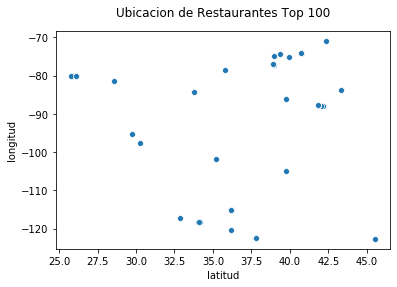

In [62]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicacion de Restaurantes Top 100', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(dffilter['latitud'], dffilter['longitud'], ax=ax);

In [11]:
from sklearn.cluster import KMeans

In [52]:
k_means_3 = KMeans(n_clusters=5, max_iter=10000)

In [53]:
k_means_3.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
centers = k_means_3.cluster_centers_

centers

array([[  27.66223583,  -81.06688333],
       [  36.47997542, -118.10843167],
       [  40.13391895,  -74.76160421],
       [  41.81445   ,  -87.19478591],
       [  33.747895  ,  -99.9805825 ]])

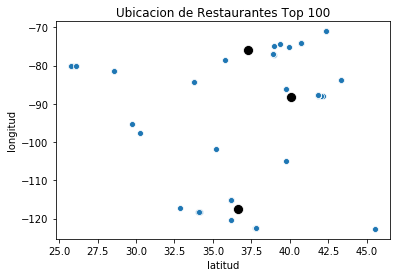

In [27]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicacion de Restaurantes Top 100', pad=5)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

#palette rainbow, da un color para cada region
#s= tamaño de los puntos
#los negros son los centroides .... los puntos negros
#en esto nos dice cuales son los puntos donde podemos crear centros de vigilancia se ubican
#tomando puntos que abarquen mas valores
sns.scatterplot(df['latitud'], df['longitud'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

In [28]:
clasificaciones = k_means.predict(df[['latitud', 'longitud']])

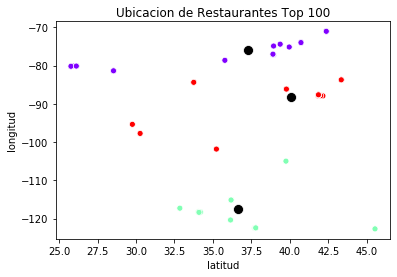

In [29]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicacion de Restaurantes Top 100', pad=5)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

#s= tamaño de los puntos
#hue=clasificaciones agrega diferentes colores
sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

In [40]:
k_means_5 = KMeans(n_clusters=5, max_iter=10000)
k_means_5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
k_means_5.fit(df[['latitud', 'longitud']])
centers_5 = k_means_5.cluster_centers_

#primero hay que poner  cuantas clases queremos que genere
#cuando se usa la funcion predict ve a que centroide pertenece clasificacion
clasificaciones_5 = k_means_5.predict(df[['latitud', 'longitud']])

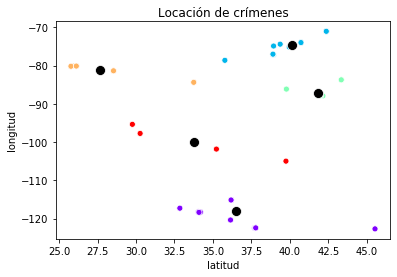

In [33]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicacion de Restaurantes TOP 100', pad=5)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(df['latitud'], df['longitud'], ax=ax, hue=clasificaciones_5, palette='rainbow');
sns.scatterplot(centers_5[:,0], centers_5[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

In [51]:
state_geo = f'../../Datasets/us_states.json'
state_unemployment = f'../../Datasets/us_unemployment-oct_2012.csv'
state_data = pd.read_csv(state_unemployment)

#location le decimos donde queremos que se centre el mapa dandole lattitude y longitud
#Width and height es para indicar el tamaño de la ventana
#zoom, para indicar que tan granded o pequeño se ve el mapa de inicio
m = folium.Map(location=[48, -102], zoom_start=3, width='60%', height='60%')


folium.Choropleth(
    geo_data=state_geo, #el geo data en json
    name='choropleth', 
    data=state_data, #el set de datos
    columns=['State', 'Unemployment'], #las columnas que queremos graficar, la primera es la que se vincula con el geojson en la segunda el dato que va a graficar
    key_on='feature.id', #indicamos con que columna del geo json que se va a asociar con la primera columna que dimos en columns
    fill_color='YlGn', #de que color va a salir la informacion
    fill_opacity=0.7, #la opcacidad de los colores
    line_opacity=0.2, #Opacidad de la linea
    legend_name='Unemployment Rate (%)' #el nombre de la linea que indica que significa los colores (o el mapa de calor)
).add_to(m)

folium.LayerControl().add_to(m)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'